In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc 

In [2]:
df1 = pd.read_csv("2014년 졸음운전 교통사고.csv", encoding = "EUC-KR", index_col="구분")
df2 = pd.read_csv("2015년 졸음운전 교통사고.csv", encoding = "EUC-KR", index_col="구분")
df3 = pd.read_csv("2016년 졸음운전 교통사고.csv", encoding = "EUC-KR", index_col="구분")

In [3]:
# display(df1, df2, df3, )
data = pd.concat([df1,df2,df3], join="outer")
# data = pd.concat([df1,df2,df3], join="outer", keys=["2014년", "2015년", "2016년"])
data_copy = data
data_copy.index[0]
data.head(3)

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358


#to_datetime() 응용해보기  
  
data_copy.index = pd.to_datetime(data_copy["사망(명)"], format = "%d")  
data_copy.set_index([data_copy.index.day], inplace=True )  
data_copy.index.names = ["명"]   
data_copy

In [4]:
data_copy.index = pd.to_datetime(data_copy.index, format = "%Y년%m월")
data_copy.set_index([data_copy.index.year, data_copy.index.month], inplace=True )
data_copy.index.names = ["연도", "월"]
data_copy

사고(건)  사망(명)  부상(명)
연도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

In [5]:
#연도별 평균 사망자
# 월별 평균사망자
# 힌트 groupby()
# num2 = pd.DataFrame(["death_y", "death_m"])
death_y = data_copy.groupby(["연도"]).mean()[["사망(명)"]]
death_m = data_copy.groupby(["월"]).mean()[["사망(명)"]]
display(death_y,death_m)
# num2 = pd.DataFrame(pd.concat([death_y, death_m], axis=1))
# num2.T


,사망(명)
연도,
2014,10.833333
2015,9.000000
2016,8.166667


,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


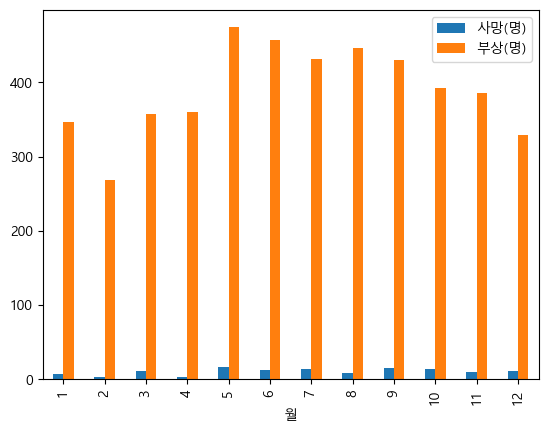

In [6]:
#14년도 월별 사망자, 부상데이터 바차트로
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

data_copy.loc[2014][["사망(명)", "부상(명)"]].plot(kind = 'bar')
plt.show()

In [12]:
#datetime 연습
# 참고 : https://reakwon.tistory.com/172
import datetime
now = datetime.datetime.now()

print(f"연도 : {now.year}")
print(f"월 : {now.month}")
print(f"일 : {now.day}")
print(f"시 : {now.hour}")
print(f"분 : {now.minute}")
print(f"초 : {now.second}")

print(now)

연도 : 2022
월 : 9
일 : 23
시 : 14
분 : 2
초 : 38
2022-09-23 14:02:38.624986
